In [328]:
import cv2

In [329]:
tiger_image = cv2.imread('/content/tiger.jfif')

array([[[ 29,  70,  49],
        [ 23,  64,  43],
        [ 30,  67,  51],
        ...,
        [ 52,  95,  82],
        [ 54,  89,  79],
        [ 47,  82,  72]],

       [[ 35,  76,  55],
        [ 25,  66,  45],
        [ 34,  71,  55],
        ...,
        [ 44,  84,  72],
        [ 44,  80,  68],
        [ 42,  77,  67]],

       [[ 21,  62,  41],
        [ 39,  80,  59],
        [ 53,  90,  74],
        ...,
        [ 72, 108,  94],
        [ 49,  84,  70],
        [ 20,  54,  43]],

       ...,

       [[ 38,  58,  76],
        [151, 171, 188],
        [131, 151, 168],
        ...,
        [ 74, 125, 121],
        [ 61, 118, 109],
        [ 67, 124, 116]],

       [[ 99, 114, 133],
        [125, 143, 160],
        [ 55,  73,  90],
        ...,
        [ 96, 145, 143],
        [ 81, 132, 128],
        [ 86, 137, 133]],

       [[ 98, 112, 131],
        [ 83,  99, 116],
        [ 68,  84, 101],
        ...,
        [108, 152, 153],
        [ 85, 132, 130],
        [ 84, 131, 129]]], dtype=uint8)
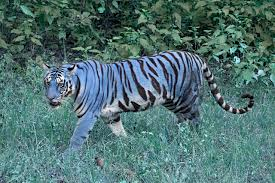

In [330]:
tiger_image

In [331]:
tiger_image.shape

(183, 275, 3)

In [332]:
print(tiger_image)

[[[ 29  70  49]
  [ 23  64  43]
  [ 30  67  51]
  ...
  [ 52  95  82]
  [ 54  89  79]
  [ 47  82  72]]

 [[ 35  76  55]
  [ 25  66  45]
  [ 34  71  55]
  ...
  [ 44  84  72]
  [ 44  80  68]
  [ 42  77  67]]

 [[ 21  62  41]
  [ 39  80  59]
  [ 53  90  74]
  ...
  [ 72 108  94]
  [ 49  84  70]
  [ 20  54  43]]

 ...

 [[ 38  58  76]
  [151 171 188]
  [131 151 168]
  ...
  [ 74 125 121]
  [ 61 118 109]
  [ 67 124 116]]

 [[ 99 114 133]
  [125 143 160]
  [ 55  73  90]
  ...
  [ 96 145 143]
  [ 81 132 128]
  [ 86 137 133]]

 [[ 98 112 131]
  [ 83  99 116]
  [ 68  84 101]
  ...
  [108 152 153]
  [ 85 132 130]
  [ 84 131 129]]]


In [333]:
gray_image = cv2.cvtColor(tiger_image, cv2.COLOR_BGR2GRAY)

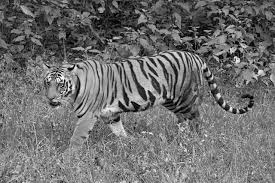

In [334]:
from google.colab.patches import cv2_imshow
cv2_imshow(gray_image)

In [335]:
gray_image.shape

(183, 275)

In [336]:
print(gray_image)

[[ 59  53  58 ...  86  82  75]
 [ 65  55  62 ...  76  72  70]
 [ 51  69  81 ... 100  76  47]
 ...
 [ 61 174 154 ... 118 109 115]
 [118 146  76 ... 139 125 130]
 [116 102  87 ... 147 126 125]]


Convolution Operation (Edge Detection)

In [337]:
import numpy as np

In [338]:
image_path = '/content/vertical-half-image.png'
image = cv2.imread(image_path)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  1,   0,   3],
        [  1,   0,   2],
        [  0,   0,   2],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[  1,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]]], dtype=uint8)
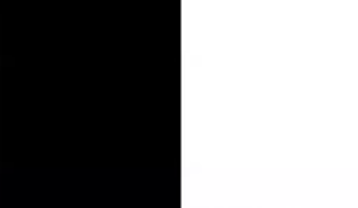

In [339]:
image

In [340]:
image_path = '/content/vertical-half-image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)
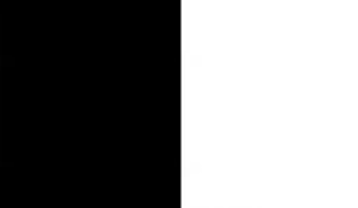

In [341]:
image

In [342]:
sobel_vertical = np.array([[-1,0,1],
                           [-2,0,2],
                           [-1,0,1]])
sobel_vertical

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [343]:
image.shape

(208, 358)

In [344]:
rows, cols = image.shape
rows, cols

(208, 358)

In [345]:
k = sobel_vertical.shape[0]
k

3

In [346]:
output_matrix = np.zeros((rows - k + 1, cols - k + 1))
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [347]:
for i in range(1, rows-1):
  for j in range(1, cols-1):
    region = image[i-1:i+2, j-1:j+2]
    output_matrix[i-1, j-1] = np.sum(region * sobel_vertical)

In [348]:
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [349]:
import matplotlib.pyplot as plt

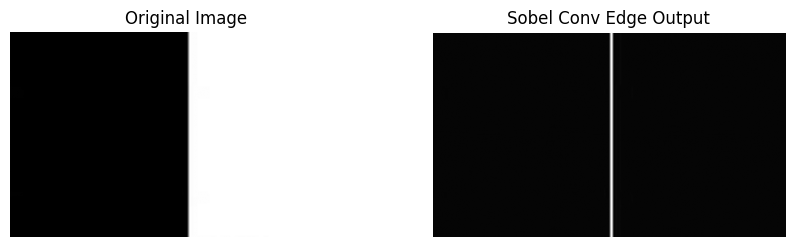

In [350]:
fig = plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap= 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Sobel Conv Edge Output")
plt.imshow(output_matrix, cmap= 'gray')
plt.axis('off')

plt.show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
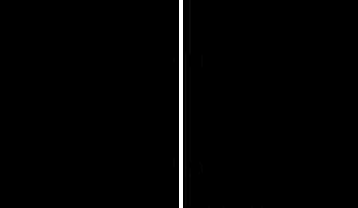

In [351]:
sobel_output = cv2.filter2D(image, -1, sobel_vertical)
sobel_output

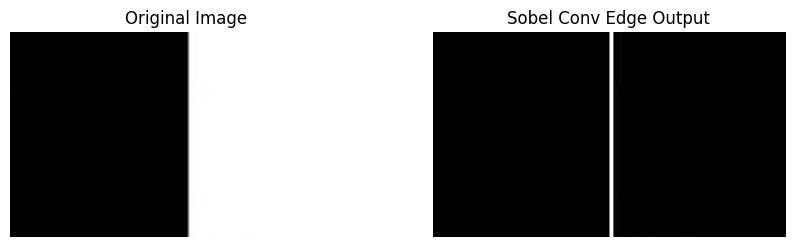

In [352]:
fig = plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap= 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Sobel Conv Edge Output")
plt.imshow(sobel_output, cmap= 'gray')
plt.axis('off')

plt.show()

In [353]:
sobel_horizontal = np.array([[+1,+2,+1],
                           [0,0,0],
                           [-1,-2,-1]])
sobel_horizontal

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
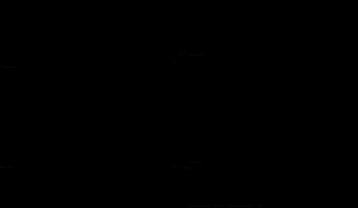

In [354]:
sobel_output = cv2.filter2D(image, -1, sobel_horizontal)
sobel_output

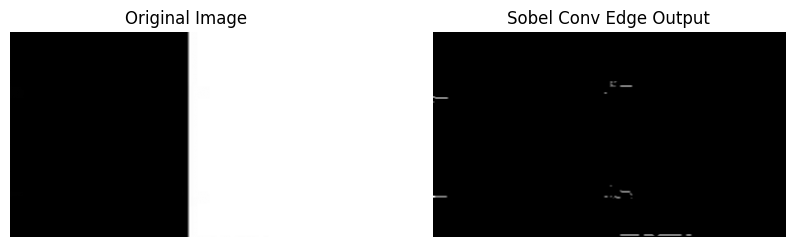

In [355]:
fig = plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image, cmap= 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Sobel Conv Edge Output")
plt.imshow(sobel_output, cmap= 'gray')
plt.axis('off')

plt.show()

In [356]:
box_blur = np.array([[1/9,1/9,1/9],
                     [1/9,1/9,1/9],
                     [1/9,1/9,1/9]])
box_blur

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

array([[ 57,  59,  57, ...,  76,  75,  74],
       [ 59,  61,  62, ...,  86,  76,  72],
       [ 69,  69,  67, ...,  86,  73,  67],
       ...,
       [129, 116, 117, ..., 131, 118, 115],
       [127, 115, 115, ..., 136, 126, 121],
       [127, 109, 104, ..., 140, 132, 126]], dtype=uint8)
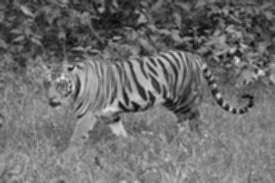

In [357]:
sobel_output = cv2.filter2D(gray_image, -1, box_blur)
sobel_output

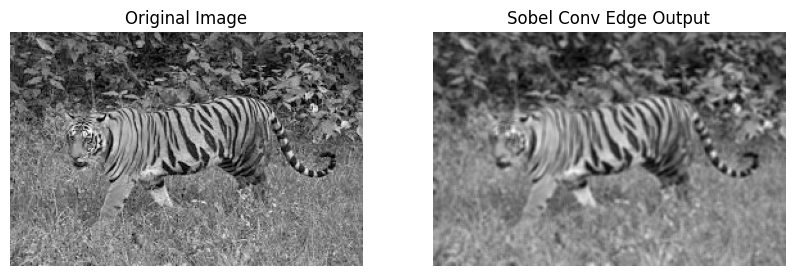

In [358]:
fig = plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(gray_image, cmap= 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Sobel Conv Edge Output")
plt.imshow(sobel_output, cmap= 'gray')
plt.axis('off')

plt.show()